# Import Libraries and data set

**Import the usual libraries for pandas and plotting**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Make a connection to the database

**Get the name of the SQL table(s) and read into DataFrame(s)**

In [12]:
import sqlite3
db_path = r'..\data\score.db'
conn = sqlite3.connect(db_path)
cur = conn.cursor()

cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

#conn.close()

[('score',)]


In [13]:
df = pd.read_sql_query("select * from score;", conn)
conn.close()

# Exploratory Data Analysis

### A quick check on the number of rows and columns

In [14]:
df.shape

(15900, 18)

### Check basic info about the data set and any missing value

**Table: Score**

In [15]:
df.head(10)

index  number_of_siblings direct_admission     CCA learning_style  \
0      0                   0              Yes  Sports         Visual   
1      1                   2               No  Sports       Auditory   
2      2                   0              Yes    None         Visual   
3      3                   1               No   Clubs       Auditory   
4      4                   0               No  Sports       Auditory   
5      5                   0               No    Arts         Visual   
6      6                   2              Yes    None         Visual   
7      7                   0               No  Sports         Visual   
8      8                   0               No    Arts       Auditory   
9      9                   2               No    Arts       Auditory   

  student_id  gender tuition  final_test  n_male  n_female   age  \
0     ACN2BE  Female      No        69.0    14.0       2.0  16.0   
1     FGXIIZ  Female      No        47.0     4.0      19.0  16.0   
2     B9AI9F    Male      No        85.0    14.0       2.0  15.0   
3     FEVM1T  Female     Yes        64.0     2.0      20.0  15.0   
4     AXZN2E    Male      No        66.0    24.0       3.0  16.0   
5     BA6R14  Female      No        57.0     9.0      12.0  15.0   
6     D5WGTI    Male      No        69.0    12.0       3.0  16.0   
7     HTP8CW    Male      No        76.0    20.0       2.0  15.0   
8     U3YRTC    Male      No        57.0    20.0       7.0  15.0   
9     3MOMA6    Male     Yes        60.0    13.0       9.0  16.0   

   hours_per_week  attendance_rate sleep_time wake_time  mode_of_transport  \
0            10.0             91.0      22:00      6:00  private transport   
1             7.0             94.0      22:30      6:30  private transport   
2             8.0             92.0      22:30      6:30  private transport   
3            18.0              NaN      21:00      5:00   public transport   
4             7.0             95.0      21:30      5:30   public transport   
5            11.0             96.0      22:30      6:30  private transport   
6            15.0             93.0      21:30      5:30   public transport   
7             3.0             97.0      21:00      5:00   public transport   
8            15.0             98.0      22:00      6:00  private transport   
9            16.0              NaN      22:30      6:30  private transport   

  bag_color  
0    yellow  
1     green  
2     white  
3    yellow  
4    yellow  
5       red  
6     green  
7     green  
8       red  
9     green

**Notice that the the dataset already has a built-in index.**
**Will make pandas use that column for the index**

In [16]:
df.set_index("index", inplace=True)
#df.set_index("index", drop=True, inplace=True)
df.head()

number_of_siblings direct_admission     CCA learning_style student_id  \
index                                                                          
0                       0              Yes  Sports         Visual     ACN2BE   
1                       2               No  Sports       Auditory     FGXIIZ   
2                       0              Yes    None         Visual     B9AI9F   
3                       1               No   Clubs       Auditory     FEVM1T   
4                       0               No  Sports       Auditory     AXZN2E   

       gender tuition  final_test  n_male  n_female   age  hours_per_week  \
index                                                                       
0      Female      No        69.0    14.0       2.0  16.0            10.0   
1      Female      No        47.0     4.0      19.0  16.0             7.0   
2        Male      No        85.0    14.0       2.0  15.0             8.0   
3      Female     Yes        64.0     2.0      20.0  15.0            18.0   
4        Male      No        66.0    24.0       3.0  16.0             7.0   

       attendance_rate sleep_time wake_time  mode_of_transport bag_color  
index                                                                     
0                 91.0      22:00      6:00  private transport    yellow  
1                 94.0      22:30      6:30  private transport     green  
2                 92.0      22:30      6:30  private transport     white  
3                  NaN      21:00      5:00   public transport    yellow  
4                 95.0      21:30      5:30   public transport    yellow

**Print a summary of the numeric data**

The avg score of the "final_test" is 67 with the lowest and top score of 32 and 100 respectively. The 25 percentile is at 56.

In [17]:
df.describe(include='all') 

number_of_siblings direct_admission    CCA learning_style student_id  \
count         15900.000000            15900  15900          15900      15900   
unique                 NaN                2      8              2      15000   
top                    NaN               No  Clubs       Auditory     GD80JW   
freq                   NaN            11195   3912           9132          2   
mean              0.886541              NaN    NaN            NaN        NaN   
std               0.751346              NaN    NaN            NaN        NaN   
min               0.000000              NaN    NaN            NaN        NaN   
25%               0.000000              NaN    NaN            NaN        NaN   
50%               1.000000              NaN    NaN            NaN        NaN   
75%               1.000000              NaN    NaN            NaN        NaN   
max               2.000000              NaN    NaN            NaN        NaN   

       gender tuition    final_test        n_male      n_female           age  \
count   15900   15900  15405.000000  15900.000000  15900.000000  15900.000000   
unique      2       4           NaN           NaN           NaN           NaN   
top      Male     Yes           NaN           NaN           NaN           NaN   
freq     7984    8669           NaN           NaN           NaN           NaN   
mean      NaN     NaN     67.165401     13.880000      8.906038     15.213459   
std       NaN     NaN     13.977879      6.552584      6.663852      1.758941   
min       NaN     NaN     32.000000      0.000000      0.000000     -5.000000   
25%       NaN     NaN     56.000000     10.000000      4.000000     15.000000   
50%       NaN     NaN     68.000000     14.000000      8.000000     15.000000   
75%       NaN     NaN     78.000000     18.000000     13.000000     16.000000   
max       NaN     NaN    100.000000     31.000000     31.000000     16.000000   

        hours_per_week  attendance_rate sleep_time wake_time  \
count     15900.000000     15122.000000      15900     15900   
unique             NaN              NaN         13         5   
top                NaN              NaN      23:00      5:00   
freq               NaN              NaN       3131      3246   
mean         10.312579        93.270268        NaN       NaN   
std           4.461861         7.984230        NaN       NaN   
min           0.000000        40.000000        NaN       NaN   
25%           7.000000        92.000000        NaN       NaN   
50%           9.000000        95.000000        NaN       NaN   
75%          14.000000        97.000000        NaN       NaN   
max          20.000000       100.000000        NaN       NaN   

       mode_of_transport bag_color  
count              15900     15900  
unique                 3         6  
top     public transport    yellow  
freq                6371      2731  
mean                 NaN       NaN  
std                  NaN       NaN  
min                  NaN       NaN  
25%                  NaN       NaN  
50%                  NaN       NaN  
75%                  NaN       NaN  
max                  NaN       NaN

**Notice that there are missing values in the "final_test" and "attendance_rate" columns**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15900 entries, 0 to 15899
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_siblings  15900 non-null  int64  
 1   direct_admission    15900 non-null  object 
 2   CCA                 15900 non-null  object 
 3   learning_style      15900 non-null  object 
 4   student_id          15900 non-null  object 
 5   gender              15900 non-null  object 
 6   tuition             15900 non-null  object 
 7   final_test          15405 non-null  float64
 8   n_male              15900 non-null  float64
 9   n_female            15900 non-null  float64
 10  age                 15900 non-null  float64
 11  hours_per_week      15900 non-null  float64
 12  attendance_rate     15122 non-null  float64
 13  sleep_time          15900 non-null  object 
 14  wake_time           15900 non-null  object 
 15  mode_of_transport   15900 non-null  object 
 16  bag_

**Get the number of missing data points per column**

In [19]:
missing_values_count = df.isnull().sum()
missing_values_count

number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
student_id              0
gender                  0
tuition                 0
final_test            495
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       778
sleep_time              0
wake_time               0
mode_of_transport       0
bag_color               0
dtype: int64

**Generate the Pandas profiling report**

In [20]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleansing & Imputation

**Duplicates**

The variable "student_id" should be unique. From the Pandas Profiling Report above, it shows that there are only 14,100 unique records. That would mean, out of the total 15,900 records, 1,800 rows are duplicates.


**Select duplicate rows based on all columns (rows that are totally identical)**

In [21]:
df[df.duplicated()]

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
1532                       1               No  Sports       Auditory   
1770                       2               No  Sports       Auditory   
2098                       2               No  Sports       Auditory   
2264                       1               No  Sports         Visual   
3240                       1               No    None         Visual   
...                      ...              ...     ...            ...   
15539                      1              Yes    None       Auditory   
15575                      1               No  Sports         Visual   
15637                      1              Yes   CLUBS       Auditory   
15651                      1               No  Sports       Auditory   
15875                      0               No   Clubs       Auditory   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
1532         1R0VBB  Female     Yes        67.0    12.0      16.0  15.0   
1770         D4KBX7    Male     Yes        56.0    11.0       7.0  16.0   
2098         I97ZR9    Male      No        54.0    14.0       6.0  15.0   
2264         WHO5I7  Female      No        58.0     8.0      23.0  16.0   
3240         RHRN1M    Male       Y        63.0    12.0      16.0  15.0   
...             ...     ...     ...         ...     ...       ...   ...   
15539        903WGD    Male      No        76.0    11.0       6.0  16.0   
15575        C6M33N  Female      No        49.0    16.0      14.0  15.0   
15637        WN3084  Female     Yes        54.0    24.0       1.0  16.0   
15651        DG1LIU  Female     Yes        54.0    14.0      10.0  15.0   
15875        MCO9BB  Female     Yes        68.0    17.0       4.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
1532                 8.0             99.0      21:30      5:30   
1770                15.0             94.0      22:30      6:30   
2098                 6.0             96.0      21:00      5:00   
2264                 9.0             97.0      21:00      5:00   
3240                14.0             98.0      23:00      7:00   
...                  ...              ...        ...       ...   
15539                3.0             93.0      22:30      6:30   
15575                5.0             87.0      21:30      5:30   
15637                5.0             93.0      22:00      6:00   
15651               15.0             97.0      21:30      5:30   
15875               13.0             99.0      22:00      6:00   

          mode_of_transport bag_color  
df_index                               
1532       public transport       red  
1770      private transport     green  
2098       public transport     black  
2264       public transport       red  
3240                   walk      blue  
...                     ...       ...  
15539     private transport     black  
15575      public transport       red  
15637     private transport      blue  
15651      public transport     white  
15875     private transport       red  

[139 rows x 17 columns]

In [22]:
# Drop all identical rows
df.drop_duplicates(inplace=True)
df

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
0                          0              Yes  Sports         Visual   
1                          2               No  Sports       Auditory   
2                          0              Yes    None         Visual   
3                          1               No   Clubs       Auditory   
4                          0               No  Sports       Auditory   
...                      ...              ...     ...            ...   
15895                      1               No   Clubs         Visual   
15896                      1              Yes    None       Auditory   
15897                      1              Yes  Sports       Auditory   
15898                      1               No   Clubs         Visual   
15899                      2              Yes    None         Visual   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
0            ACN2BE  Female      No        69.0    14.0       2.0  16.0   
1            FGXIIZ  Female      No        47.0     4.0      19.0  16.0   
2            B9AI9F    Male      No        85.0    14.0       2.0  15.0   
3            FEVM1T  Female     Yes        64.0     2.0      20.0  15.0   
4            AXZN2E    Male      No        66.0    24.0       3.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15895        XPECN2  Female      No        56.0    12.0      14.0  16.0   
15896        7AMC7S    Male     Yes        85.0    17.0       5.0  16.0   
15897        XKZ6VN  Female     Yes        76.0     7.0      10.0  15.0   
15898        2OU4UQ    Male     Yes        45.0    18.0      12.0  16.0   
15899        D9OKLV    Male      No        87.0    11.0       7.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
0                   10.0             91.0      22:00      6:00   
1                    7.0             94.0      22:30      6:30   
2                    8.0             92.0      22:30      6:30   
3                   18.0              NaN      21:00      5:00   
4                    7.0             95.0      21:30      5:30   
...                  ...              ...        ...       ...   
15895                9.0             96.0      22:00      6:00   
15896                7.0             91.0      22:30      6:30   
15897                7.0             93.0      23:00      7:00   
15898                3.0             94.0      23:00      7:00   
15899                9.0             91.0      23:00      7:00   

          mode_of_transport bag_color  
df_index                               
0         private transport    yellow  
1         private transport     green  
2         private transport     white  
3          public transport    yellow  
4          public transport    yellow  
...                     ...       ...  
15895     private transport     black  
15896     private transport     white  
15897                  walk       red  
15898                  walk    yellow  
15899                  walk    yellow  

[15761 rows x 17 columns]

In [23]:
df[df.duplicated('student_id', keep=False)]


number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
12                         0               No  Sports         Visual   
14                         0              Yes    Arts       Auditory   
21                         0               No    None         Visual   
24                         0               No    Arts         Visual   
28                         1               No    Arts         Visual   
...                      ...              ...     ...            ...   
15866                      2               No    None       Auditory   
15868                      1               No   Clubs         Visual   
15871                      1               No    Arts         Visual   
15886                      0               No    None         Visual   
15894                      0               No    NONE         Visual   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
12           T4U89N    Male     Yes        85.0    14.0       4.0  16.0   
14           G0JBVS  Female     Yes        75.0    14.0       2.0  15.0   
21           HJ6Y5P    Male     Yes        86.0    17.0       6.0  16.0   
24           PQ059G    Male      No        77.0    23.0       4.0  15.0   
28           OF3DU8    Male     Yes        70.0    10.0      14.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15866        CJ2ITO    Male     Yes        68.0    15.0       4.0  16.0   
15868        1FKAEF    Male      No        61.0    20.0       6.0  16.0   
15871        Z9YY3M  Female      No        52.0    25.0       5.0  15.0   
15886        72YL3P    Male     Yes        89.0    10.0      12.0  15.0   
15894        XT1L7Z    Male     Yes        73.0    16.0      12.0  15.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
12                   8.0             95.0      23:00      7:00   
14                  15.0             98.0      22:30      6:30   
21                   8.0             91.0      23:30      6:30   
24                   6.0             93.0      21:00      5:00   
28                  17.0             95.0      21:00      5:00   
...                  ...              ...        ...       ...   
15866               13.0             92.0      21:00      5:00   
15868                6.0             95.0      21:30      5:30   
15871               18.0             98.0      22:00      6:00   
15886                7.0             95.0      22:00      6:00   
15894               14.0             95.0      22:30      6:30   

          mode_of_transport bag_color  
df_index                               
12                     walk     green  
14        private transport     white  
21        private transport       red  
24         public transport       red  
28         public transport    yellow  
...                     ...       ...  
15866      public transport      blue  
15868      public transport    yellow  
15871     private transport     black  
15886     private transport      blue  
15894     private transport      blue  

[1522 rows x 17 columns]

**There are still 1522 duplicated rows within the student id. Do a sampling check below.**

In [24]:
df.loc[df.student_id=='OF3DU8']

number_of_siblings direct_admission   CCA learning_style student_id  \
df_index                                                                        
28                         1               No  Arts         Visual     OF3DU8   
9943                       1               No  Arts         Visual     OF3DU8   

         gender tuition  final_test  n_male  n_female   age  hours_per_week  \
df_index                                                                      
28         Male     Yes        70.0    10.0      14.0  16.0            17.0   
9943       Male     Yes        70.0    10.0      14.0  16.0            17.0   

          attendance_rate sleep_time wake_time mode_of_transport bag_color  
df_index                                                                    
28                   95.0      21:00      5:00  public transport    yellow  
9943                 95.0      21:00      5:00  public transport     green

In [25]:
df.loc[df.student_id=='Z9YY3M'] # from the gender column, retrieve the row with "Other"

number_of_siblings direct_admission   CCA learning_style student_id  \
df_index                                                                        
1580                       1               No  Arts         Visual     Z9YY3M   
15871                      1               No  Arts         Visual     Z9YY3M   

          gender tuition  final_test  n_male  n_female   age  hours_per_week  \
df_index                                                                       
1580      Female      No        52.0    25.0       5.0  15.0            18.0   
15871     Female      No        52.0    25.0       5.0  15.0            18.0   

          attendance_rate sleep_time wake_time  mode_of_transport bag_color  
df_index                                                                     
1580                 98.0      22:00      6:00  private transport     green  
15871                98.0      22:00      6:00  private transport     black

**Analysis**

From the above, looks like the only difference in these duplicate rows are in the last column "bag_color". We will drop the this last column in df1 and re-run to check if the no. of duplicate rows is = 1522.


In [26]:
df1 = df.copy()
df1 = df1.drop(['bag_color'], axis=1)
df1

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
0                          0              Yes  Sports         Visual   
1                          2               No  Sports       Auditory   
2                          0              Yes    None         Visual   
3                          1               No   Clubs       Auditory   
4                          0               No  Sports       Auditory   
...                      ...              ...     ...            ...   
15895                      1               No   Clubs         Visual   
15896                      1              Yes    None       Auditory   
15897                      1              Yes  Sports       Auditory   
15898                      1               No   Clubs         Visual   
15899                      2              Yes    None         Visual   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
0            ACN2BE  Female      No        69.0    14.0       2.0  16.0   
1            FGXIIZ  Female      No        47.0     4.0      19.0  16.0   
2            B9AI9F    Male      No        85.0    14.0       2.0  15.0   
3            FEVM1T  Female     Yes        64.0     2.0      20.0  15.0   
4            AXZN2E    Male      No        66.0    24.0       3.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15895        XPECN2  Female      No        56.0    12.0      14.0  16.0   
15896        7AMC7S    Male     Yes        85.0    17.0       5.0  16.0   
15897        XKZ6VN  Female     Yes        76.0     7.0      10.0  15.0   
15898        2OU4UQ    Male     Yes        45.0    18.0      12.0  16.0   
15899        D9OKLV    Male      No        87.0    11.0       7.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
0                   10.0             91.0      22:00      6:00   
1                    7.0             94.0      22:30      6:30   
2                    8.0             92.0      22:30      6:30   
3                   18.0              NaN      21:00      5:00   
4                    7.0             95.0      21:30      5:30   
...                  ...              ...        ...       ...   
15895                9.0             96.0      22:00      6:00   
15896                7.0             91.0      22:30      6:30   
15897                7.0             93.0      23:00      7:00   
15898                3.0             94.0      23:00      7:00   
15899                9.0             91.0      23:00      7:00   

          mode_of_transport  
df_index                     
0         private transport  
1         private transport  
2         private transport  
3          public transport  
4          public transport  
...                     ...  
15895     private transport  
15896     private transport  
15897                  walk  
15898                  walk  
15899                  walk  

[15761 rows x 16 columns]

In [27]:
dup_row = df1[df1.duplicated(keep=False)]
dup_row

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
12                         0               No  Sports         Visual   
14                         0              Yes    Arts       Auditory   
21                         0               No    None         Visual   
24                         0               No    Arts         Visual   
28                         1               No    Arts         Visual   
...                      ...              ...     ...            ...   
15866                      2               No    None       Auditory   
15868                      1               No   Clubs         Visual   
15871                      1               No    Arts         Visual   
15886                      0               No    None         Visual   
15894                      0               No    NONE         Visual   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
12           T4U89N    Male     Yes        85.0    14.0       4.0  16.0   
14           G0JBVS  Female     Yes        75.0    14.0       2.0  15.0   
21           HJ6Y5P    Male     Yes        86.0    17.0       6.0  16.0   
24           PQ059G    Male      No        77.0    23.0       4.0  15.0   
28           OF3DU8    Male     Yes        70.0    10.0      14.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15866        CJ2ITO    Male     Yes        68.0    15.0       4.0  16.0   
15868        1FKAEF    Male      No        61.0    20.0       6.0  16.0   
15871        Z9YY3M  Female      No        52.0    25.0       5.0  15.0   
15886        72YL3P    Male     Yes        89.0    10.0      12.0  15.0   
15894        XT1L7Z    Male     Yes        73.0    16.0      12.0  15.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
12                   8.0             95.0      23:00      7:00   
14                  15.0             98.0      22:30      6:30   
21                   8.0             91.0      23:30      6:30   
24                   6.0             93.0      21:00      5:00   
28                  17.0             95.0      21:00      5:00   
...                  ...              ...        ...       ...   
15866               13.0             92.0      21:00      5:00   
15868                6.0             95.0      21:30      5:30   
15871               18.0             98.0      22:00      6:00   
15886                7.0             95.0      22:00      6:00   
15894               14.0             95.0      22:30      6:30   

          mode_of_transport  
df_index                     
12                     walk  
14        private transport  
21        private transport  
24         public transport  
28         public transport  
...                     ...  
15866      public transport  
15868      public transport  
15871     private transport  
15886     private transport  
15894     private transport  

[1252 rows x 16 columns]

**The # of duplicated rows is only 1252. That would mean out of the 1522 duplicated rows, only 1252 records have to do with the 'bag_color'. There is another 270 duplicated rows which are not.**

We will proceed to remove the duplicated rows (626 row) and then look into the remaining 270 duplicated rows.

In [28]:
# Drop all identical rows in df1
df1.drop_duplicates(inplace=True)
df1

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
0                          0              Yes  Sports         Visual   
1                          2               No  Sports       Auditory   
2                          0              Yes    None         Visual   
3                          1               No   Clubs       Auditory   
4                          0               No  Sports       Auditory   
...                      ...              ...     ...            ...   
15895                      1               No   Clubs         Visual   
15896                      1              Yes    None       Auditory   
15897                      1              Yes  Sports       Auditory   
15898                      1               No   Clubs         Visual   
15899                      2              Yes    None         Visual   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
0            ACN2BE  Female      No        69.0    14.0       2.0  16.0   
1            FGXIIZ  Female      No        47.0     4.0      19.0  16.0   
2            B9AI9F    Male      No        85.0    14.0       2.0  15.0   
3            FEVM1T  Female     Yes        64.0     2.0      20.0  15.0   
4            AXZN2E    Male      No        66.0    24.0       3.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15895        XPECN2  Female      No        56.0    12.0      14.0  16.0   
15896        7AMC7S    Male     Yes        85.0    17.0       5.0  16.0   
15897        XKZ6VN  Female     Yes        76.0     7.0      10.0  15.0   
15898        2OU4UQ    Male     Yes        45.0    18.0      12.0  16.0   
15899        D9OKLV    Male      No        87.0    11.0       7.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
0                   10.0             91.0      22:00      6:00   
1                    7.0             94.0      22:30      6:30   
2                    8.0             92.0      22:30      6:30   
3                   18.0              NaN      21:00      5:00   
4                    7.0             95.0      21:30      5:30   
...                  ...              ...        ...       ...   
15895                9.0             96.0      22:00      6:00   
15896                7.0             91.0      22:30      6:30   
15897                7.0             93.0      23:00      7:00   
15898                3.0             94.0      23:00      7:00   
15899                9.0             91.0      23:00      7:00   

          mode_of_transport  
df_index                     
0         private transport  
1         private transport  
2         private transport  
3          public transport  
4          public transport  
...                     ...  
15895     private transport  
15896     private transport  
15897                  walk  
15898                  walk  
15899                  walk  

[15135 rows x 16 columns]

**We will now extract the remaining 270 duplicated rows of student id for our inspection**

In [29]:
df2=df1[df1.duplicated('student_id', keep=False)]
df2

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
40                         1               No    Arts         Visual   
67                         0               No  Sports       Auditory   
129                        0               No  Sports         Visual   
145                        2               No    Arts         Visual   
321                        0               No  Sports       Auditory   
...                      ...              ...     ...            ...   
15750                      0               No    None       Auditory   
15755                      1              Yes    None         Visual   
15783                      1              Yes    Arts         Visual   
15814                      0               No    Arts       Auditory   
15817                      1               No   Clubs       Auditory   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
40           2HD89P    Male     Yes        71.0    10.0      15.0  15.0   
67           7XH8AD  Female     Yes        55.0     8.0      14.0  16.0   
129          6F1PTH    Male     Yes        96.0    12.0      11.0  15.0   
145          FR8U8M  Female      No        41.0     3.0      19.0   6.0   
321          5EM4RO  Female      No        94.0     5.0      20.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15750        XAFZ5Z    Male     Yes        92.0    22.0       3.0  15.0   
15755        VWDRAH    Male      No        76.0    16.0       4.0  16.0   
15783        AX1U3L    Male     Yes        94.0    18.0       3.0  16.0   
15814        HL7EEZ    Male     Yes         NaN    12.0       9.0  16.0   
15817        8LDTFT  Female     Yes        64.0     9.0      18.0  15.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
40                  15.0             91.0      22:30      5:30   
67                   7.0             96.0      21:30      5:30   
129                  8.0             98.0      22:00      6:00   
145                  8.0             96.0      22:00      6:00   
321                  7.0             93.0      23:00      7:00   
...                  ...              ...        ...       ...   
15750               10.0              NaN      22:30      6:30   
15755                7.0              NaN      21:00      5:00   
15783                7.0             92.0      23:00      7:00   
15814                9.0             96.0      21:00      5:00   
15817               15.0             97.0      22:00      6:00   

          mode_of_transport  
df_index                     
40         public transport  
67         public transport  
129       private transport  
145       private transport  
321                    walk  
...                     ...  
15750     private transport  
15755      public transport  
15783                  walk  
15814      public transport  
15817     private transport  

[270 rows x 16 columns]

In [30]:
df2.loc[df.student_id=='CZLOYU']

number_of_siblings direct_admission   CCA learning_style student_id  \
df_index                                                                        
376                        2              Yes  Arts         Visual     CZLOYU   
11732                      2              Yes  Arts         Visual     CZLOYU   

          gender tuition  final_test  n_male  n_female   age  hours_per_week  \
df_index                                                                       
376       Female      No        72.0     9.0      11.0  15.0             6.0   
11732     Female      No        72.0     9.0      11.0  15.0             6.0   

          attendance_rate sleep_time wake_time  mode_of_transport  
df_index                                                           
376                   NaN      22:00      6:00  private transport  
11732                96.0      22:00      6:00  private transport

In [31]:
df2.loc[df.student_id=='DO7UAH']

number_of_siblings direct_admission    CCA learning_style  \
df_index                                                              
1232                       1               No  Clubs         Visual   
9950                       1               No  Clubs         Visual   

         student_id gender tuition  final_test  n_male  n_female   age  \
df_index                                                                 
1232         DO7UAH   Male      No        48.0    18.0      12.0  16.0   
9950         DO7UAH   Male      No         NaN    18.0      12.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
1232                 6.0             91.0      21:30      5:30   
9950                 6.0             91.0      21:30      5:30   

         mode_of_transport  
df_index                    
1232      public transport  
9950      public transport

**Analysis**

From the above, we notice that the only different in these identical rows is the Null field in either the "final_test" or "attendance_rate" variable.

We will remove those records with Null. To do this, we will need to extract the index (for deletion) and the student_id (for our checking)

**Extract rows with Null in 'final_test' or 'attendance_rate' columns in table df2**

In [32]:
rows_todrop = df2.loc[(df2['final_test'].isnull()) | (df2['attendance_rate'].isnull())]
rows_todrop

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
355                        1               No  Sports       Auditory   
376                        2              Yes    Arts         Visual   
476                        1               No  Sports       Auditory   
637                        0               No   Clubs         Visual   
643                        1               No    ARTS         Visual   
...                      ...              ...     ...            ...   
15689                      2              Yes  Sports         Visual   
15706                      1               No    Arts       Auditory   
15750                      0               No    None       Auditory   
15755                      1              Yes    None         Visual   
15814                      0               No    Arts       Auditory   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
355          Q3R2ER    Male      No        59.0    22.0       5.0  16.0   
376          CZLOYU  Female      No        72.0     9.0      11.0  15.0   
476          PY1HX9    Male      No        54.0    23.0       1.0  15.0   
637          M1XMR8  Female     Yes        66.0     7.0      15.0  15.0   
643          4QPNEA    Male     Yes        63.0    24.0       4.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15689        YV6QTI    Male      No        42.0    18.0       4.0  16.0   
15706        SGCHM0  Female      No         NaN     1.0      24.0  16.0   
15750        XAFZ5Z    Male     Yes        92.0    22.0       3.0  15.0   
15755        VWDRAH    Male      No        76.0    16.0       4.0  16.0   
15814        HL7EEZ    Male     Yes         NaN    12.0       9.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
355                 18.0              NaN      21:30      5:30   
376                  6.0              NaN      22:00      6:00   
476                 15.0              NaN      23:00      7:00   
637                  5.0              NaN      23:00      7:00   
643                  7.0              NaN      22:30      6:30   
...                  ...              ...        ...       ...   
15689               11.0              NaN      21:30      5:30   
15706                4.0             82.0       0:30      6:30   
15750               10.0              NaN      22:30      6:30   
15755                7.0              NaN      21:00      5:00   
15814                9.0             96.0      21:00      5:00   

          mode_of_transport  
df_index                     
355        public transport  
376       private transport  
476                    walk  
637                    walk  
643       private transport  
...                     ...  
15689      public transport  
15706     private transport  
15750     private transport  
15755      public transport  
15814      public transport  

[140 rows x 16 columns]

**Check for duplicate rows on student id**

In [33]:
studID = rows_todrop[rows_todrop.duplicated('student_id', keep=False)]

studID.sort_values('student_id')


number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
735                        1               No   Clubs       Auditory   
3452                       1               No   Clubs       Auditory   
6381                       2              Yes    None       Auditory   
11561                      2              Yes    None       Auditory   
3350                       0               No    None         Visual   
5431                       0               No    None         Visual   
14108                      1              Yes    None         Visual   
15755                      1              Yes    None         Visual   
6654                       1               No  Sports       Auditory   
15127                      1               No  Sports       Auditory   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
735          H7N3F1    Male      No        54.0    10.0      14.0  16.0   
3452         H7N3F1    Male      No         NaN    10.0      14.0  16.0   
6381         H9KJUR  Female     Yes         NaN     0.0      16.0  15.0   
11561        H9KJUR  Female     Yes        56.0     0.0      16.0  15.0   
3350         JGWFQ8  Female     Yes         NaN    15.0       8.0  15.0   
5431         JGWFQ8  Female     Yes        93.0    15.0       8.0  15.0   
14108        VWDRAH    Male      No         NaN    16.0       4.0  16.0   
15755        VWDRAH    Male      No        76.0    16.0       4.0  16.0   
6654         ZGVJX8  Female     Yes         NaN     3.0      25.0  16.0   
15127        ZGVJX8  Female     Yes        62.0     3.0      25.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
735                 18.0              NaN      21:00      5:00   
3452                18.0             98.0      21:00      5:00   
6381                16.0             99.0      22:00      6:00   
11561               16.0              NaN      22:00      6:00   
3350                 5.0             95.0      22:00      6:00   
5431                 5.0              NaN      22:00      6:00   
14108                7.0             93.0      21:00      5:00   
15755                7.0              NaN      21:00      5:00   
6654                 8.0             97.0      22:00      6:00   
15127                8.0              NaN      22:00      6:00   

          mode_of_transport  
df_index                     
735        public transport  
3452       public transport  
6381      private transport  
11561     private transport  
3350      private transport  
5431      private transport  
14108      public transport  
15755      public transport  
6654      private transport  
15127     private transport

**We will merge these 10 duplicated rows above later into 5 rows and not removing them now**

In [34]:
# Get the index for these 10 rows
index10 = list(studID.index)
index10

[735, 3350, 3452, 5431, 6381, 6654, 11561, 14108, 15127, 15755]

In [35]:
# Remove these record from table rows_todrop
rows_todrop1 = rows_todrop.drop(rows_todrop[rows_todrop.index.isin(index10)].index.tolist())
rows_todrop1

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
355                        1               No  Sports       Auditory   
376                        2              Yes    Arts         Visual   
476                        1               No  Sports       Auditory   
637                        0               No   Clubs         Visual   
643                        1               No    ARTS         Visual   
...                      ...              ...     ...            ...   
15600                      2               No    Arts       Auditory   
15689                      2              Yes  Sports         Visual   
15706                      1               No    Arts       Auditory   
15750                      0               No    None       Auditory   
15814                      0               No    Arts       Auditory   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
355          Q3R2ER    Male      No        59.0    22.0       5.0  16.0   
376          CZLOYU  Female      No        72.0     9.0      11.0  15.0   
476          PY1HX9    Male      No        54.0    23.0       1.0  15.0   
637          M1XMR8  Female     Yes        66.0     7.0      15.0  15.0   
643          4QPNEA    Male     Yes        63.0    24.0       4.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15600        DS0QOH  Female     Yes        37.0     2.0      20.0  15.0   
15689        YV6QTI    Male      No        42.0    18.0       4.0  16.0   
15706        SGCHM0  Female      No         NaN     1.0      24.0  16.0   
15750        XAFZ5Z    Male     Yes        92.0    22.0       3.0  15.0   
15814        HL7EEZ    Male     Yes         NaN    12.0       9.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
355                 18.0              NaN      21:30      5:30   
376                  6.0              NaN      22:00      6:00   
476                 15.0              NaN      23:00      7:00   
637                  5.0              NaN      23:00      7:00   
643                  7.0              NaN      22:30      6:30   
...                  ...              ...        ...       ...   
15600                5.0              NaN      22:30      5:30   
15689               11.0              NaN      21:30      5:30   
15706                4.0             82.0       0:30      6:30   
15750               10.0              NaN      22:30      6:30   
15814                9.0             96.0      21:00      5:00   

          mode_of_transport  
df_index                     
355        public transport  
376       private transport  
476                    walk  
637                    walk  
643       private transport  
...                     ...  
15600      public transport  
15689      public transport  
15706     private transport  
15750     private transport  
15814      public transport  

[130 rows x 16 columns]

**We will get the index for these 130 rows and remove them from table df1**

In [36]:
# Get the index for these 130 rows
index130 = list(rows_todrop1.index)

# Remove these record from table df1
df1 = df1.drop(df1[df1.index.isin(index130)].index.tolist())
df1

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
0                          0              Yes  Sports         Visual   
1                          2               No  Sports       Auditory   
2                          0              Yes    None         Visual   
3                          1               No   Clubs       Auditory   
4                          0               No  Sports       Auditory   
...                      ...              ...     ...            ...   
15895                      1               No   Clubs         Visual   
15896                      1              Yes    None       Auditory   
15897                      1              Yes  Sports       Auditory   
15898                      1               No   Clubs         Visual   
15899                      2              Yes    None         Visual   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
0            ACN2BE  Female      No        69.0    14.0       2.0  16.0   
1            FGXIIZ  Female      No        47.0     4.0      19.0  16.0   
2            B9AI9F    Male      No        85.0    14.0       2.0  15.0   
3            FEVM1T  Female     Yes        64.0     2.0      20.0  15.0   
4            AXZN2E    Male      No        66.0    24.0       3.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15895        XPECN2  Female      No        56.0    12.0      14.0  16.0   
15896        7AMC7S    Male     Yes        85.0    17.0       5.0  16.0   
15897        XKZ6VN  Female     Yes        76.0     7.0      10.0  15.0   
15898        2OU4UQ    Male     Yes        45.0    18.0      12.0  16.0   
15899        D9OKLV    Male      No        87.0    11.0       7.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
0                   10.0             91.0      22:00      6:00   
1                    7.0             94.0      22:30      6:30   
2                    8.0             92.0      22:30      6:30   
3                   18.0              NaN      21:00      5:00   
4                    7.0             95.0      21:30      5:30   
...                  ...              ...        ...       ...   
15895                9.0             96.0      22:00      6:00   
15896                7.0             91.0      22:30      6:30   
15897                7.0             93.0      23:00      7:00   
15898                3.0             94.0      23:00      7:00   
15899                9.0             91.0      23:00      7:00   

          mode_of_transport  
df_index                     
0         private transport  
1         private transport  
2         private transport  
3          public transport  
4          public transport  
...                     ...  
15895     private transport  
15896     private transport  
15897                  walk  
15898                  walk  
15899                  walk  

[15005 rows x 16 columns]

**We will now merge the 10 duplicate rows into 5 records and remove the other 5 records**

In [37]:
df1.loc[735,"attendance_rate"]=98
df1.loc[6381,"final_test"]=56
df1.loc[3350,"final_test"]=93
df1.loc[14108,"final_test"]=76
df1.loc[6654,"final_test"]=62

df1.drop([3452, 11561, 5431, 15755, 15127], inplace=True)
df1

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
0                          0              Yes  Sports         Visual   
1                          2               No  Sports       Auditory   
2                          0              Yes    None         Visual   
3                          1               No   Clubs       Auditory   
4                          0               No  Sports       Auditory   
...                      ...              ...     ...            ...   
15895                      1               No   Clubs         Visual   
15896                      1              Yes    None       Auditory   
15897                      1              Yes  Sports       Auditory   
15898                      1               No   Clubs         Visual   
15899                      2              Yes    None         Visual   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
0            ACN2BE  Female      No        69.0    14.0       2.0  16.0   
1            FGXIIZ  Female      No        47.0     4.0      19.0  16.0   
2            B9AI9F    Male      No        85.0    14.0       2.0  15.0   
3            FEVM1T  Female     Yes        64.0     2.0      20.0  15.0   
4            AXZN2E    Male      No        66.0    24.0       3.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15895        XPECN2  Female      No        56.0    12.0      14.0  16.0   
15896        7AMC7S    Male     Yes        85.0    17.0       5.0  16.0   
15897        XKZ6VN  Female     Yes        76.0     7.0      10.0  15.0   
15898        2OU4UQ    Male     Yes        45.0    18.0      12.0  16.0   
15899        D9OKLV    Male      No        87.0    11.0       7.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
0                   10.0             91.0      22:00      6:00   
1                    7.0             94.0      22:30      6:30   
2                    8.0             92.0      22:30      6:30   
3                   18.0              NaN      21:00      5:00   
4                    7.0             95.0      21:30      5:30   
...                  ...              ...        ...       ...   
15895                9.0             96.0      22:00      6:00   
15896                7.0             91.0      22:30      6:30   
15897                7.0             93.0      23:00      7:00   
15898                3.0             94.0      23:00      7:00   
15899                9.0             91.0      23:00      7:00   

          mode_of_transport  
df_index                     
0         private transport  
1         private transport  
2         private transport  
3          public transport  
4          public transport  
...                     ...  
15895     private transport  
15896     private transport  
15897                  walk  
15898                  walk  
15899                  walk  

[15000 rows x 16 columns]

**Re-run the following for updates**

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15899
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_siblings  15000 non-null  int64  
 1   direct_admission    15000 non-null  object 
 2   CCA                 15000 non-null  object 
 3   learning_style      15000 non-null  object 
 4   student_id          15000 non-null  object 
 5   gender              15000 non-null  object 
 6   tuition             15000 non-null  object 
 7   final_test          14559 non-null  float64
 8   n_male              15000 non-null  float64
 9   n_female            15000 non-null  float64
 10  age                 15000 non-null  float64
 11  hours_per_week      15000 non-null  float64
 12  attendance_rate     14312 non-null  float64
 13  sleep_time          15000 non-null  object 
 14  wake_time           15000 non-null  object 
 15  mode_of_transport   15000 non-null  object 
dtypes: f

In [39]:
missing_values_count = df1.isnull().sum()
missing_values_count

number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
student_id              0
gender                  0
tuition                 0
final_test            441
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       688
sleep_time              0
wake_time               0
mode_of_transport       0
dtype: int64

**Impute the missing values in the "attendance_rate" column with its mean value**

In [40]:
attendance_rate_mean=df["attendance_rate"].mean()
attendance_rate_mean=int(attendance_rate_mean)
attendance_rate_mean

df1["attendance_rate"].fillna(attendance_rate_mean, inplace=True)
df1

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
0                          0              Yes  Sports         Visual   
1                          2               No  Sports       Auditory   
2                          0              Yes    None         Visual   
3                          1               No   Clubs       Auditory   
4                          0               No  Sports       Auditory   
...                      ...              ...     ...            ...   
15895                      1               No   Clubs         Visual   
15896                      1              Yes    None       Auditory   
15897                      1              Yes  Sports       Auditory   
15898                      1               No   Clubs         Visual   
15899                      2              Yes    None         Visual   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
0            ACN2BE  Female      No        69.0    14.0       2.0  16.0   
1            FGXIIZ  Female      No        47.0     4.0      19.0  16.0   
2            B9AI9F    Male      No        85.0    14.0       2.0  15.0   
3            FEVM1T  Female     Yes        64.0     2.0      20.0  15.0   
4            AXZN2E    Male      No        66.0    24.0       3.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15895        XPECN2  Female      No        56.0    12.0      14.0  16.0   
15896        7AMC7S    Male     Yes        85.0    17.0       5.0  16.0   
15897        XKZ6VN  Female     Yes        76.0     7.0      10.0  15.0   
15898        2OU4UQ    Male     Yes        45.0    18.0      12.0  16.0   
15899        D9OKLV    Male      No        87.0    11.0       7.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
0                   10.0             91.0      22:00      6:00   
1                    7.0             94.0      22:30      6:30   
2                    8.0             92.0      22:30      6:30   
3                   18.0             93.0      21:00      5:00   
4                    7.0             95.0      21:30      5:30   
...                  ...              ...        ...       ...   
15895                9.0             96.0      22:00      6:00   
15896                7.0             91.0      22:30      6:30   
15897                7.0             93.0      23:00      7:00   
15898                3.0             94.0      23:00      7:00   
15899                9.0             91.0      23:00      7:00   

          mode_of_transport  
df_index                     
0         private transport  
1         private transport  
2         private transport  
3          public transport  
4          public transport  
...                     ...  
15895     private transport  
15896     private transport  
15897                  walk  
15898                  walk  
15899                  walk  

[15000 rows x 16 columns]

In [41]:
df1['attendance_rate'].isnull().sum()

0

**Removing null records based on 'final_test' column**

In [42]:
df1=df1.dropna(subset=['final_test'])
df1

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
0                          0              Yes  Sports         Visual   
1                          2               No  Sports       Auditory   
2                          0              Yes    None         Visual   
3                          1               No   Clubs       Auditory   
4                          0               No  Sports       Auditory   
...                      ...              ...     ...            ...   
15895                      1               No   Clubs         Visual   
15896                      1              Yes    None       Auditory   
15897                      1              Yes  Sports       Auditory   
15898                      1               No   Clubs         Visual   
15899                      2              Yes    None         Visual   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
0            ACN2BE  Female      No        69.0    14.0       2.0  16.0   
1            FGXIIZ  Female      No        47.0     4.0      19.0  16.0   
2            B9AI9F    Male      No        85.0    14.0       2.0  15.0   
3            FEVM1T  Female     Yes        64.0     2.0      20.0  15.0   
4            AXZN2E    Male      No        66.0    24.0       3.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15895        XPECN2  Female      No        56.0    12.0      14.0  16.0   
15896        7AMC7S    Male     Yes        85.0    17.0       5.0  16.0   
15897        XKZ6VN  Female     Yes        76.0     7.0      10.0  15.0   
15898        2OU4UQ    Male     Yes        45.0    18.0      12.0  16.0   
15899        D9OKLV    Male      No        87.0    11.0       7.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
0                   10.0             91.0      22:00      6:00   
1                    7.0             94.0      22:30      6:30   
2                    8.0             92.0      22:30      6:30   
3                   18.0             93.0      21:00      5:00   
4                    7.0             95.0      21:30      5:30   
...                  ...              ...        ...       ...   
15895                9.0             96.0      22:00      6:00   
15896                7.0             91.0      22:30      6:30   
15897                7.0             93.0      23:00      7:00   
15898                3.0             94.0      23:00      7:00   
15899                9.0             91.0      23:00      7:00   

          mode_of_transport  
df_index                     
0         private transport  
1         private transport  
2         private transport  
3          public transport  
4          public transport  
...                     ...  
15895     private transport  
15896     private transport  
15897                  walk  
15898                  walk  
15899                  walk  

[14559 rows x 16 columns]

In [43]:
missing_values_count = df1.isnull().sum()
missing_values_count

number_of_siblings    0
direct_admission      0
CCA                   0
learning_style        0
student_id            0
gender                0
tuition               0
final_test            0
n_male                0
n_female              0
age                   0
hours_per_week        0
attendance_rate       0
sleep_time            0
wake_time             0
mode_of_transport     0
dtype: int64

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14559 entries, 0 to 15899
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_siblings  14559 non-null  int64  
 1   direct_admission    14559 non-null  object 
 2   CCA                 14559 non-null  object 
 3   learning_style      14559 non-null  object 
 4   student_id          14559 non-null  object 
 5   gender              14559 non-null  object 
 6   tuition             14559 non-null  object 
 7   final_test          14559 non-null  float64
 8   n_male              14559 non-null  float64
 9   n_female            14559 non-null  float64
 10  age                 14559 non-null  float64
 11  hours_per_week      14559 non-null  float64
 12  attendance_rate     14559 non-null  float64
 13  sleep_time          14559 non-null  object 
 14  wake_time           14559 non-null  object 
 15  mode_of_transport   14559 non-null  object 
dtypes: f

# Data Transformation / Features Engineering

In [45]:
df1

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
0                          0              Yes  Sports         Visual   
1                          2               No  Sports       Auditory   
2                          0              Yes    None         Visual   
3                          1               No   Clubs       Auditory   
4                          0               No  Sports       Auditory   
...                      ...              ...     ...            ...   
15895                      1               No   Clubs         Visual   
15896                      1              Yes    None       Auditory   
15897                      1              Yes  Sports       Auditory   
15898                      1               No   Clubs         Visual   
15899                      2              Yes    None         Visual   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
0            ACN2BE  Female      No        69.0    14.0       2.0  16.0   
1            FGXIIZ  Female      No        47.0     4.0      19.0  16.0   
2            B9AI9F    Male      No        85.0    14.0       2.0  15.0   
3            FEVM1T  Female     Yes        64.0     2.0      20.0  15.0   
4            AXZN2E    Male      No        66.0    24.0       3.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15895        XPECN2  Female      No        56.0    12.0      14.0  16.0   
15896        7AMC7S    Male     Yes        85.0    17.0       5.0  16.0   
15897        XKZ6VN  Female     Yes        76.0     7.0      10.0  15.0   
15898        2OU4UQ    Male     Yes        45.0    18.0      12.0  16.0   
15899        D9OKLV    Male      No        87.0    11.0       7.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
0                   10.0             91.0      22:00      6:00   
1                    7.0             94.0      22:30      6:30   
2                    8.0             92.0      22:30      6:30   
3                   18.0             93.0      21:00      5:00   
4                    7.0             95.0      21:30      5:30   
...                  ...              ...        ...       ...   
15895                9.0             96.0      22:00      6:00   
15896                7.0             91.0      22:30      6:30   
15897                7.0             93.0      23:00      7:00   
15898                3.0             94.0      23:00      7:00   
15899                9.0             91.0      23:00      7:00   

          mode_of_transport  
df_index                     
0         private transport  
1         private transport  
2         private transport  
3          public transport  
4          public transport  
...                     ...  
15895     private transport  
15896     private transport  
15897                  walk  
15898                  walk  
15899                  walk  

[14559 rows x 16 columns]

**Checking the unique values on some of the fields**

In [46]:
df1.direct_admission.unique()

array(['Yes', 'No'], dtype=object)

In [47]:
df1.CCA.unique()

array(['Sports', 'None', 'Clubs', 'Arts', 'ARTS', 'SPORTS', 'CLUBS',
       'NONE'], dtype=object)

In [48]:
df1.tuition.unique()

array(['No', 'Yes', 'Y', 'N'], dtype=object)

In [49]:
df1.learning_style.unique()

array(['Visual', 'Auditory'], dtype=object)

In [50]:
df1.age.unique()

array([16., 15.,  5.,  6., -4., -5.])

In [51]:
df1['age'].value_counts()

 16.0    7082
 15.0    7057
 6.0      216
 5.0      199
-5.0        4
-4.0        1
Name: age, dtype: int64

**Standardise the values**

In [52]:
df1 = df1.replace({'CCA': {'SPORTS':'Sports','NONE':'None','CLUBS':'Clubs','ARTS':'Arts'}})
df1 = df1.replace({'tuition': {'No':'N' ,'Yes':'Y'}})
df1 = df1.replace({'age': {6.0:16.0 , 5.0:15.0, -5.0:15.0, -4.0:14.0}})
df1

number_of_siblings direct_admission     CCA learning_style  \
df_index                                                               
0                          0              Yes  Sports         Visual   
1                          2               No  Sports       Auditory   
2                          0              Yes    None         Visual   
3                          1               No   Clubs       Auditory   
4                          0               No  Sports       Auditory   
...                      ...              ...     ...            ...   
15895                      1               No   Clubs         Visual   
15896                      1              Yes    None       Auditory   
15897                      1              Yes  Sports       Auditory   
15898                      1               No   Clubs         Visual   
15899                      2              Yes    None         Visual   

         student_id  gender tuition  final_test  n_male  n_female   age  \
df_index                                                                  
0            ACN2BE  Female       N        69.0    14.0       2.0  16.0   
1            FGXIIZ  Female       N        47.0     4.0      19.0  16.0   
2            B9AI9F    Male       N        85.0    14.0       2.0  15.0   
3            FEVM1T  Female       Y        64.0     2.0      20.0  15.0   
4            AXZN2E    Male       N        66.0    24.0       3.0  16.0   
...             ...     ...     ...         ...     ...       ...   ...   
15895        XPECN2  Female       N        56.0    12.0      14.0  16.0   
15896        7AMC7S    Male       Y        85.0    17.0       5.0  16.0   
15897        XKZ6VN  Female       Y        76.0     7.0      10.0  15.0   
15898        2OU4UQ    Male       Y        45.0    18.0      12.0  16.0   
15899        D9OKLV    Male       N        87.0    11.0       7.0  16.0   

          hours_per_week  attendance_rate sleep_time wake_time  \
df_index                                                         
0                   10.0             91.0      22:00      6:00   
1                    7.0             94.0      22:30      6:30   
2                    8.0             92.0      22:30      6:30   
3                   18.0             93.0      21:00      5:00   
4                    7.0             95.0      21:30      5:30   
...                  ...              ...        ...       ...   
15895                9.0             96.0      22:00      6:00   
15896                7.0             91.0      22:30      6:30   
15897                7.0             93.0      23:00      7:00   
15898                3.0             94.0      23:00      7:00   
15899                9.0             91.0      23:00      7:00   

          mode_of_transport  
df_index                     
0         private transport  
1         private transport  
2         private transport  
3          public transport  
4          public transport  
...                     ...  
15895     private transport  
15896     private transport  
15897                  walk  
15898                  walk  
15899                  walk  

[14559 rows x 16 columns]

In [53]:
df1['age'].value_counts()

16.0    7298
15.0    7260
14.0       1
Name: age, dtype: int64

**Transforming using One-Hot Encoding on some of the categorical columns**

In [54]:
# Features transformation
df1 = pd.get_dummies(df1, columns = ['number_of_siblings','direct_admission','CCA', 'learning_style', 'gender', 'tuition', 'mode_of_transport'])

# Rename the columns
df1.rename(columns = {'number_of_siblings_0':'siblings_0',
                      'number_of_siblings_1':'siblings_1',
                      'number_of_siblings_2':'siblings_2',
                      'direct_admission_Yes':'dirAdm_Yes',
                      'direct_admission_No':'dirAdm_No',
                      'learning_style_Auditory':'lstyle_Auditory',
                      'learning_style_Visual':'lstyle_Visual',
                      'gender_Female':'Female',
                      'gender_Male':'Male',
                      'mode_of_transport_private transport':'trans_private',
                      'mode_of_transport_public transport':'trans_public',
                      'mode_of_transport_walk':'trans_walk'
                     }, inplace = True)
df1

student_id  final_test  n_male  n_female   age  hours_per_week  \
df_index                                                                  
0            ACN2BE        69.0    14.0       2.0  16.0            10.0   
1            FGXIIZ        47.0     4.0      19.0  16.0             7.0   
2            B9AI9F        85.0    14.0       2.0  15.0             8.0   
3            FEVM1T        64.0     2.0      20.0  15.0            18.0   
4            AXZN2E        66.0    24.0       3.0  16.0             7.0   
...             ...         ...     ...       ...   ...             ...   
15895        XPECN2        56.0    12.0      14.0  16.0             9.0   
15896        7AMC7S        85.0    17.0       5.0  16.0             7.0   
15897        XKZ6VN        76.0     7.0      10.0  15.0             7.0   
15898        2OU4UQ        45.0    18.0      12.0  16.0             3.0   
15899        D9OKLV        87.0    11.0       7.0  16.0             9.0   

          attendance_rate sleep_time wake_time  siblings_0  ...  CCA_Sports  \
df_index                                                    ...               
0                    91.0      22:00      6:00           1  ...           1   
1                    94.0      22:30      6:30           0  ...           1   
2                    92.0      22:30      6:30           1  ...           0   
3                    93.0      21:00      5:00           0  ...           0   
4                    95.0      21:30      5:30           1  ...           1   
...                   ...        ...       ...         ...  ...         ...   
15895                96.0      22:00      6:00           0  ...           0   
15896                91.0      22:30      6:30           0  ...           0   
15897                93.0      23:00      7:00           0  ...           1   
15898                94.0      23:00      7:00           0  ...           0   
15899                91.0      23:00      7:00           0  ...           0   

          lstyle_Auditory  lstyle_Visual  Female  Male  tuition_N  tuition_Y  \
df_index                                                                       
0                       0              1       1     0          1          0   
1                       1              0       1     0          1          0   
2                       0              1       0     1          1          0   
3                       1              0       1     0          0          1   
4                       1              0       0     1          1          0   
...                   ...            ...     ...   ...        ...        ...   
15895                   0              1       1     0          1          0   
15896                   1              0       0     1          0          1   
15897                   1              0       1     0          0          1   
15898                   0              1       0     1          0          1   
15899                   0              1       0     1          1          0   

          trans_private  trans_public  trans_walk  
df_index                                           
0                     1             0           0  
1                     1             0           0  
2                     1             0           0  
3                     0             1           0  
4                     0             1           0  
...                 ...           ...         ...  
15895                 1             0           0  
15896                 1             0           0  
15897                 0             0           1  
15898                 0             0           1  
15899                 0             0           1  

[14559 rows x 27 columns]

**Next we try to determin the no. of hours of sleep from 'sleep_time' and 'wake_time'**

First convert both "sleep_time" and "wake_time" from object to datetime

In [55]:
sleep_time_parsed = pd.to_datetime(df1['sleep_time'], format="%H:%M")
sleep_time_parsed.head()

df_index
0   1900-01-01 22:00:00
1   1900-01-01 22:30:00
2   1900-01-01 22:30:00
3   1900-01-01 21:00:00
4   1900-01-01 21:30:00
Name: sleep_time, dtype: datetime64[ns]

In [56]:
wake_time_parsed = pd.to_datetime(df1['wake_time'], format="%H:%M")
wake_time_parsed.head()

df_index
0   1900-01-01 06:00:00
1   1900-01-01 06:30:00
2   1900-01-01 06:30:00
3   1900-01-01 05:00:00
4   1900-01-01 05:30:00
Name: wake_time, dtype: datetime64[ns]

**Functions to extract both the hours (converting to mins) and the minutes from sleep/wake time**

In [57]:
def get_hour(hr):
    hour_in_min = hr.dt.strftime('%H')
    hour_in_min = hour_in_min.astype(int) #converting object type to int
    return hour_in_min*60 # converting to minutes
        
def get_min(x):
    minutes = x.dt.strftime('%M')
    minutes = minutes.astype(int) #converting object type to int
    return minutes

#From sleep_time_parsed
Hr=get_hour(sleep_time_parsed)
Mins=get_min(sleep_time_parsed)

sleep_time_min = Hr + Mins #Sleep time in minutes
#print(sleep_time_min)

#From wake_time_parsed
Hr=get_hour(wake_time_parsed)
Mins=get_min(wake_time_parsed)

wake_time_min = Hr + Mins #Wake up time in minutes


**Calculate the total sleeping time**

In [58]:
hour_sleep = (wake_time_min-sleep_time_min)/60 #Converting from minutes back to hour

# Create function to check and add 24 to the -ve values
def chk_less_than(x):
    sleep = x
    if sleep > 0:
        return sleep
    elif sleep < 0:
        sleep = sleep + 24
        return sleep
        

# Create a new column "hr_sleep" in the dataframe
#df1["hr_sleep"] = hour_sleep.apply(chk_less_than)
sleep = hour_sleep.apply(chk_less_than)
df1.insert(loc=9, column="hr_sleep", value=sleep)
df1


student_id  final_test  n_male  n_female   age  hours_per_week  \
df_index                                                                  
0            ACN2BE        69.0    14.0       2.0  16.0            10.0   
1            FGXIIZ        47.0     4.0      19.0  16.0             7.0   
2            B9AI9F        85.0    14.0       2.0  15.0             8.0   
3            FEVM1T        64.0     2.0      20.0  15.0            18.0   
4            AXZN2E        66.0    24.0       3.0  16.0             7.0   
...             ...         ...     ...       ...   ...             ...   
15895        XPECN2        56.0    12.0      14.0  16.0             9.0   
15896        7AMC7S        85.0    17.0       5.0  16.0             7.0   
15897        XKZ6VN        76.0     7.0      10.0  15.0             7.0   
15898        2OU4UQ        45.0    18.0      12.0  16.0             3.0   
15899        D9OKLV        87.0    11.0       7.0  16.0             9.0   

          attendance_rate sleep_time wake_time  hr_sleep  ...  CCA_Sports  \
df_index                                                  ...               
0                    91.0      22:00      6:00       8.0  ...           1   
1                    94.0      22:30      6:30       8.0  ...           1   
2                    92.0      22:30      6:30       8.0  ...           0   
3                    93.0      21:00      5:00       8.0  ...           0   
4                    95.0      21:30      5:30       8.0  ...           1   
...                   ...        ...       ...       ...  ...         ...   
15895                96.0      22:00      6:00       8.0  ...           0   
15896                91.0      22:30      6:30       8.0  ...           0   
15897                93.0      23:00      7:00       8.0  ...           1   
15898                94.0      23:00      7:00       8.0  ...           0   
15899                91.0      23:00      7:00       8.0  ...           0   

          lstyle_Auditory  lstyle_Visual  Female  Male  tuition_N  tuition_Y  \
df_index                                                                       
0                       0              1       1     0          1          0   
1                       1              0       1     0          1          0   
2                       0              1       0     1          1          0   
3                       1              0       1     0          0          1   
4                       1              0       0     1          1          0   
...                   ...            ...     ...   ...        ...        ...   
15895                   0              1       1     0          1          0   
15896                   1              0       0     1          0          1   
15897                   1              0       1     0          0          1   
15898                   0              1       0     1          0          1   
15899                   0              1       0     1          1          0   

          trans_private  trans_public  trans_walk  
df_index                                           
0                     1             0           0  
1                     1             0           0  
2                     1             0           0  
3                     0             1           0  
4                     0             1           0  
...                 ...           ...         ...  
15895                 1             0           0  
15896                 1             0           0  
15897                 0             0           1  
15898                 0             0           1  
15899                 0             0           1  

[14559 rows x 28 columns]

**Check what are the unique values or any null in the "hr_sleep" column created**

In [59]:
df1.hr_sleep.unique()

array([8., 7., 5., 6., 4.])

In [60]:
df1.drop(['sleep_time','wake_time'], axis=1, inplace=True)
df1

student_id  final_test  n_male  n_female   age  hours_per_week  \
df_index                                                                  
0            ACN2BE        69.0    14.0       2.0  16.0            10.0   
1            FGXIIZ        47.0     4.0      19.0  16.0             7.0   
2            B9AI9F        85.0    14.0       2.0  15.0             8.0   
3            FEVM1T        64.0     2.0      20.0  15.0            18.0   
4            AXZN2E        66.0    24.0       3.0  16.0             7.0   
...             ...         ...     ...       ...   ...             ...   
15895        XPECN2        56.0    12.0      14.0  16.0             9.0   
15896        7AMC7S        85.0    17.0       5.0  16.0             7.0   
15897        XKZ6VN        76.0     7.0      10.0  15.0             7.0   
15898        2OU4UQ        45.0    18.0      12.0  16.0             3.0   
15899        D9OKLV        87.0    11.0       7.0  16.0             9.0   

          attendance_rate  hr_sleep  siblings_0  siblings_1  ...  CCA_Sports  \
df_index                                                     ...               
0                    91.0       8.0           1           0  ...           1   
1                    94.0       8.0           0           0  ...           1   
2                    92.0       8.0           1           0  ...           0   
3                    93.0       8.0           0           1  ...           0   
4                    95.0       8.0           1           0  ...           1   
...                   ...       ...         ...         ...  ...         ...   
15895                96.0       8.0           0           1  ...           0   
15896                91.0       8.0           0           1  ...           0   
15897                93.0       8.0           0           1  ...           1   
15898                94.0       8.0           0           1  ...           0   
15899                91.0       8.0           0           0  ...           0   

          lstyle_Auditory  lstyle_Visual  Female  Male  tuition_N  tuition_Y  \
df_index                                                                       
0                       0              1       1     0          1          0   
1                       1              0       1     0          1          0   
2                       0              1       0     1          1          0   
3                       1              0       1     0          0          1   
4                       1              0       0     1          1          0   
...                   ...            ...     ...   ...        ...        ...   
15895                   0              1       1     0          1          0   
15896                   1              0       0     1          0          1   
15897                   1              0       1     0          0          1   
15898                   0              1       0     1          0          1   
15899                   0              1       0     1          1          0   

          trans_private  trans_public  trans_walk  
df_index                                           
0                     1             0           0  
1                     1             0           0  
2                     1             0           0  
3                     0             1           0  
4                     0             1           0  
...                 ...           ...         ...  
15895                 1             0           0  
15896                 1             0           0  
15897                 0             0           1  
15898                 0             0           1  
15899                 0             0           1  

[14559 rows x 26 columns]

# Data Visualisation

**Finding the Correlation between the features**

<AxesSubplot:>

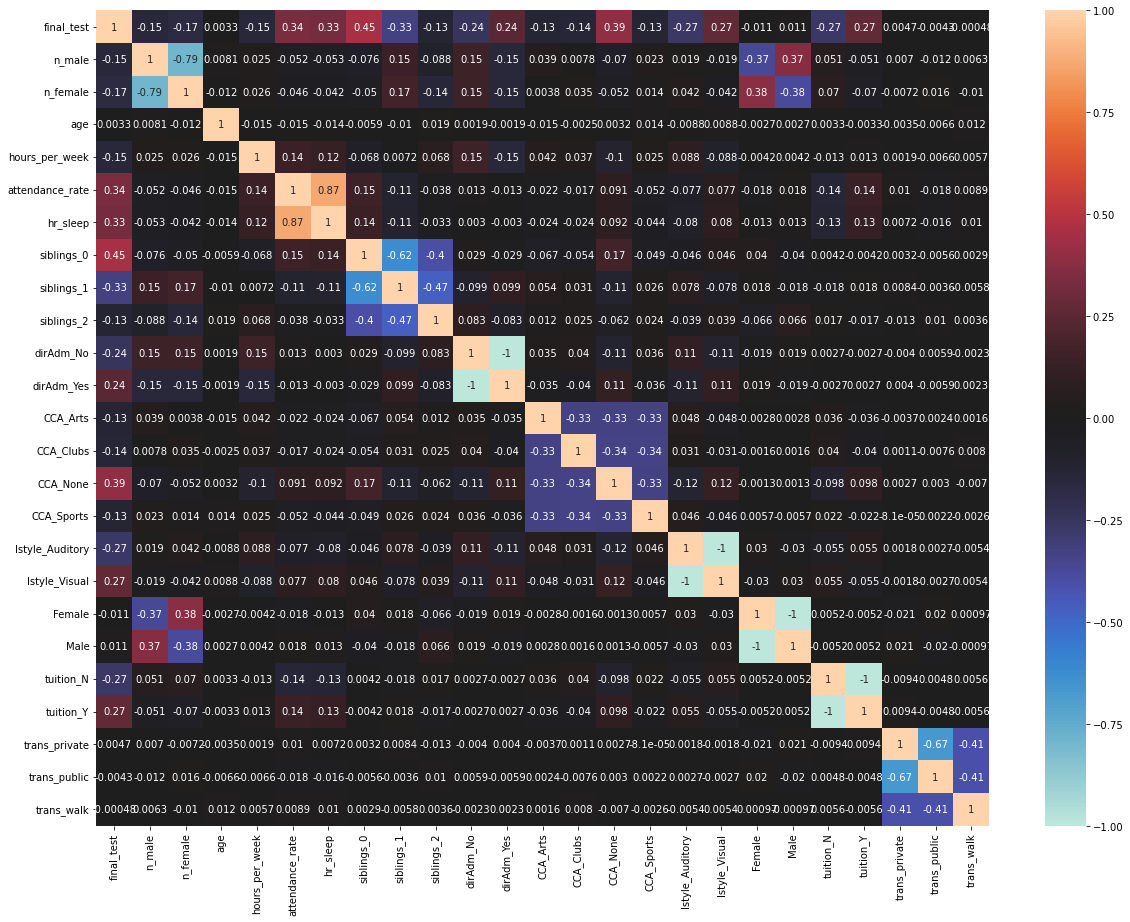

In [61]:
""" Correlation Matrix with Heatmap """
plt.figure(figsize=(20, 15))
filtered_df1=df1.loc[:,df1.columns!="index"]
sns.heatmap(df1.corr(), vmax=1, vmin=-1, center=0, annot=True)

**Data Nomalisation**

In [62]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

df1['attendance_rate'] = scaler.fit_transform(df1[["attendance_rate"]])
df1['hr_sleep'] = scaler.fit_transform(df1[["hr_sleep"]])

df1

student_id  final_test  n_male  n_female   age  hours_per_week  \
df_index                                                                  
0            ACN2BE        69.0    14.0       2.0  16.0            10.0   
1            FGXIIZ        47.0     4.0      19.0  16.0             7.0   
2            B9AI9F        85.0    14.0       2.0  15.0             8.0   
3            FEVM1T        64.0     2.0      20.0  15.0            18.0   
4            AXZN2E        66.0    24.0       3.0  16.0             7.0   
...             ...         ...     ...       ...   ...             ...   
15895        XPECN2        56.0    12.0      14.0  16.0             9.0   
15896        7AMC7S        85.0    17.0       5.0  16.0             7.0   
15897        XKZ6VN        76.0     7.0      10.0  15.0             7.0   
15898        2OU4UQ        45.0    18.0      12.0  16.0             3.0   
15899        D9OKLV        87.0    11.0       7.0  16.0             9.0   

          attendance_rate  hr_sleep  siblings_0  siblings_1  ...  CCA_Sports  \
df_index                                                     ...               
0                0.850000       1.0           1           0  ...           1   
1                0.900000       1.0           0           0  ...           1   
2                0.866667       1.0           1           0  ...           0   
3                0.883333       1.0           0           1  ...           0   
4                0.916667       1.0           1           0  ...           1   
...                   ...       ...         ...         ...  ...         ...   
15895            0.933333       1.0           0           1  ...           0   
15896            0.850000       1.0           0           1  ...           0   
15897            0.883333       1.0           0           1  ...           1   
15898            0.900000       1.0           0           1  ...           0   
15899            0.850000       1.0           0           0  ...           0   

          lstyle_Auditory  lstyle_Visual  Female  Male  tuition_N  tuition_Y  \
df_index                                                                       
0                       0              1       1     0          1          0   
1                       1              0       1     0          1          0   
2                       0              1       0     1          1          0   
3                       1              0       1     0          0          1   
4                       1              0       0     1          1          0   
...                   ...            ...     ...   ...        ...        ...   
15895                   0              1       1     0          1          0   
15896                   1              0       0     1          0          1   
15897                   1              0       1     0          0          1   
15898                   0              1       0     1          0          1   
15899                   0              1       0     1          1          0   

          trans_private  trans_public  trans_walk  
df_index                                           
0                     1             0           0  
1                     1             0           0  
2                     1             0           0  
3                     0             1           0  
4                     0             1           0  
...                 ...           ...         ...  
15895                 1             0           0  
15896                 1             0           0  
15897                 0             0           1  
15898                 0             0           1  
15899                 0             0           1  

[14559 rows x 26 columns]

In [63]:
df1.hr_sleep.unique()

array([1.  , 0.75, 0.25, 0.5 , 0.  ])